 #  <p style="text-align: center;">Unsupervised Learning Project Problem Definition

AllLife Credit Card Customer Segmentation
Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.
Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.
Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?
Data Description:
 Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.
Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.
Steps to follow:
1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

## Loading the Dataset

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

#More modules will be imported later in the program as and when necessary

customer_df = pd.read_excel("Credit Card Customer Data.xlsx")
customer_df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

The dataset contains all continious variables. There is no Target or Y variable. All varialbes can be considered as features

In [67]:
customer_df.shape

(660, 7)

In [68]:
customer_df.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [69]:
customer_df.isnull().sum()


Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [70]:
#There are no null values

In [71]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [72]:
customer_df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

Sl_No just seems to be an artificial key introduced in the dataset to make the records unique. This is a standard practice as data is
usually held in RDBMS tables that must have a unique primary key. So Sl_No is not a true feature and should be dropped. Customer key
seems to identify a customer. There seem to be some duplicates as unique count is less than 660. It also can be dropped after doing a detailed
duplicate analysis. All other (5) attributes are true features that need to be considered for clustering and modelling

In [73]:
customer_df.drop(["Sl_No"], axis=1, inplace=True)

## Analysis of duplicates
Since we have removed SL_No (which had artificially made data unique), we can now analyse data for duplicates. In a segmentation or clustering problem it is extremely important to ensure that duplicates do not influence the results. However
care must be taken than only TRUE DUPLICATES are removed. It apears that Customer Key attribute is duplicated in some records, however
unless ALL the values are duplicated we cannot treat it as true duplicate as we would not know which row to retain and which to delete

In [74]:
dd=customer_df.duplicated().sum()
print(dd)

0


In [75]:
#It appears that there are no true duplicates, we shall confirm it by another way also, as below

In [76]:
#find duplicates by addding "is duplicate" flag and check if any are returhed as True
customer_df["is_duplicate"]= customer_df.duplicated()
#customer_df.loc[customer_df["is_duplicate"] == True]
customer_df["is_duplicate"].value_counts()

False    660
Name: is_duplicate, dtype: int64

All are false. So now we can confirm that there are no true duplicates. Column "customer key" can be dropped as it is not a true customer attribute.
Also the "is duplicate" column can be dropped as it has served its purpose

In [77]:
customer_df.drop(["Customer Key", "is_duplicate"], axis=1, inplace=True)

In [78]:
customer_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


## Univariate analysis
I shall use distplot and boxploe, one below other, for each feature and provide commentary at the end in conjuction with 
output from Describe command and count of unique values

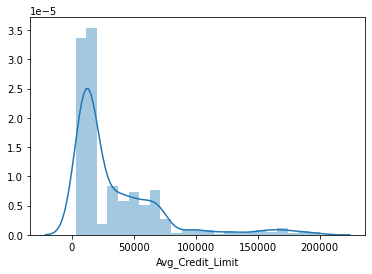

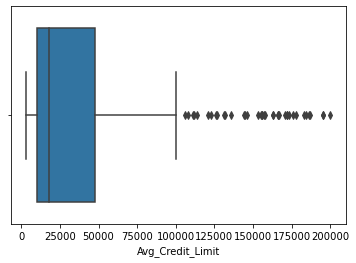

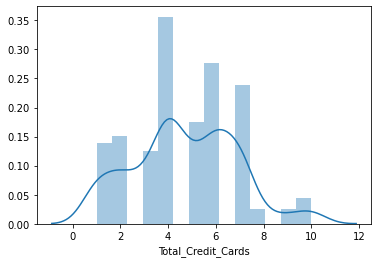

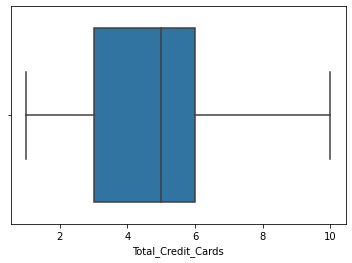

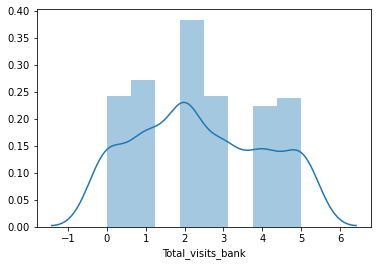

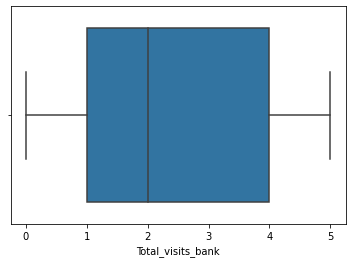

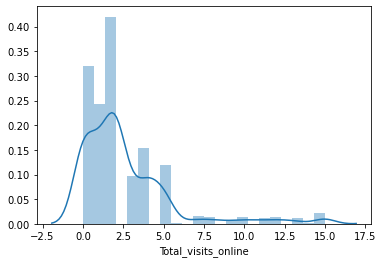

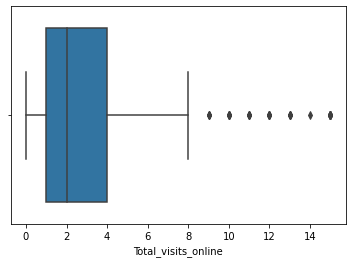

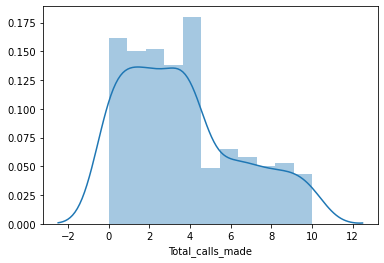

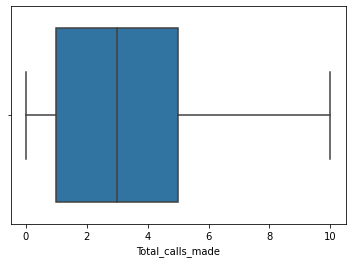

In [79]:
import matplotlib.pyplot as plt
for i in ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online', 'Total_calls_made']:
    sns.distplot(customer_df[i])
    plt.show()
    sns.boxplot(customer_df[i])
    plt.show()

Avg_Credit_Limit - This has 3 Gaussians (one close to mean, other between 50k and 100k and the third between 150k and 200k).
There is a long tail on right, mean < median, and number of outliers on the right side, which are beyond the 75% + 1.5*IQR. This indicates
that a good number of customers have very high avg credit limit and they may be a separate group from other customers.

Total_Credit_Cards - This has 4 Gaussians, mean is close to median, no outliers

Total_visits_bank - This has 2 Gaussians, mean is close to median, no outliers

Total_visits_online - This has 2 Gaussians. There is a long tail on righ and number of outliers on the right side, which are beyond the 75% + 1.5*IQR.

Total_calls_made - This has a flat Gaussian peak. Mean is close to median and no outliers

General comment - Except avg_credit_limit, the unique values are very less (in tens) for other features i.e. they are more like
categories. However they will continue to be considered as continious for the clustering analysis

## Scaling
The units are different for different features, as such scaling is must, otherwise the algorithms will be biased towards higher numbers.
We can use Zscore or Minmax scaler. I have experiemented with Z score and I found that we get slightly different boxplots for
scaled data and unscaled data (althoguh other plots and coorelation matrix reamins same) with Z score because Z score method introduces 
negative values (as it is centred around mean) and it affects boxplots. I also found that with Zsore scaling I got slightly inferior
silhouette scores and got slightly different 'best cluster' solution from K-Maeans and Agglomerative (K-means suggested 3 as best
 and 2 as second best whereas AGL suggested 2 as best and 3 as second best) Whereas with MInmax scaling
I got slightly better silhouette scores and firm convergenece on 3 clusters through both K-Maeans and Agglomerative. Also the boxplots
on both scaled and unscaled data appear same (and so all other graphs including corr matrix).
AS SUCH I AM GOING WITH MINMAX SCALING, althoguh I understand that for some other data Zscore may be more appropriate

In [80]:
scaler = MinMaxScaler()
customerScaled = customer_df.copy()
customerScaled[customerScaled.columns]=scaler.fit_transform(customerScaled[customerScaled.columns])
customerScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.492386,0.111111,0.2,0.066667,0.0
1,0.238579,0.222222,0.0,0.666667,0.9
2,0.238579,0.666667,0.2,0.200000,0.4
3,0.137056,0.444444,0.2,0.066667,0.4
4,0.492386,0.555556,0.0,0.800000,0.3


In [81]:
customerScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,0.160275,0.190992,0.0,0.035533,0.076142,0.228426,1.0
Total_Credit_Cards,660.0,0.411785,0.240871,0.0,0.222222,0.444444,0.555556,1.0
Total_visits_bank,660.0,0.480606,0.326363,0.0,0.200000,0.400000,0.800000,1.0
Total_visits_online,660.0,0.173737,0.195715,0.0,0.066667,0.133333,0.266667,1.0
Total_calls_made,660.0,0.358333,0.286532,0.0,0.100000,0.300000,0.500000,1.0


## Multivariate analysis

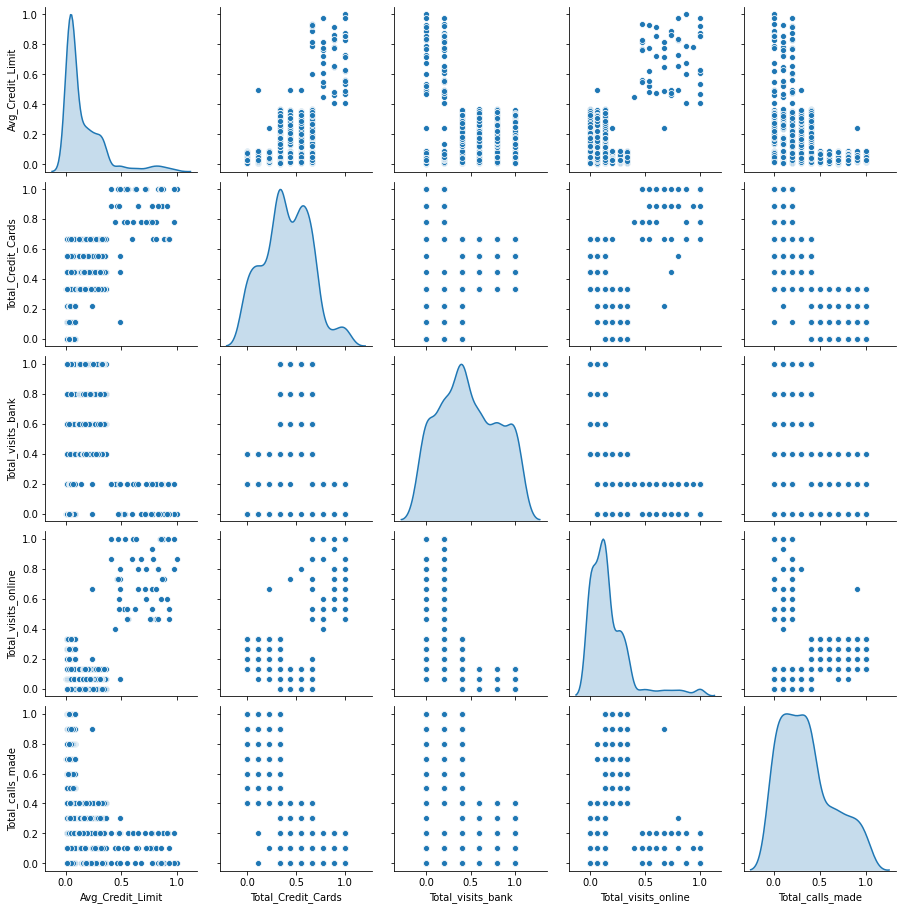

In [82]:
sns.pairplot(customerScaled,diag_kind='kde')

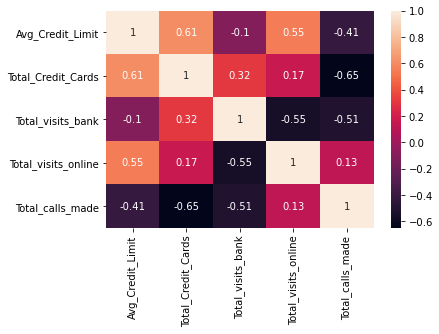

In [83]:
corr = customer_df.corr()
sns.heatmap(corr, annot = True)

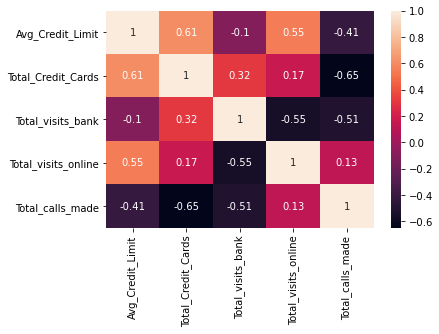

In [84]:
corrscaled = customerScaled.corr()
sns.heatmap(corrscaled, annot = True)

Note from pairplots that histograms look same as displots. Also note that the corr matrix for both original and scaled dataframes is same, confirming that the scaling
has not changed the character of dataframe.

Overall from the pairplots and heatmap we can deduce:
    1. Positive correlation between Avg_Credit_Limit and Total_Credit_Cards. This is expected. Also some positive correlation 
     between total credit cards and total visits to bank.
    2. Slightly less positive correalation between Avg_Credit_Limit and Total_visits_online. This indicates these customers are probably
    checking their spend, or spending more online
    3. Negative correlation between bank visits and online visits - expected as those visiting online are less likely to visit personally
    4. Negative correlation between bank visits and calls made - again expected 
    5. Negative correlation between average credit limit and calls made - this ties in with the fact that those with higher limit are doing
    more online banking, whereas those relying on phone calls may be customers not confortable with online and are likely to have lower credit limit
    6. Negative coorelation between Total_credit cards and calls made
    7. No other significant correlation

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

In [85]:
#let us first make copies of original and scaled dataframes to be used later in hierarchical clustering, as the we will change
#them as a result of K means clustering
custattr = customerScaled.copy() # save features array (X)
customer_df_hier = customer_df.copy()
customerScaled_hier = customerScaled.copy()
customerScaled_hier.shape

(660, 5)

In [86]:
print(custattr.shape[0])

660


In [87]:
custattr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.492386,0.111111,0.2,0.066667,0.0
1,0.238579,0.222222,0.0,0.666667,0.9
2,0.238579,0.666667,0.2,0.200000,0.4
3,0.137056,0.444444,0.2,0.066667,0.4
4,0.492386,0.555556,0.0,0.800000,0.3


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

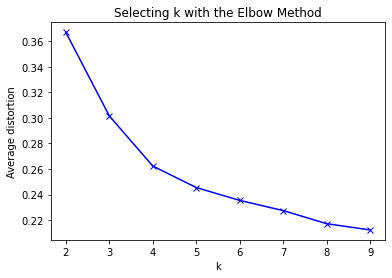

In [88]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10) #minimum 2 clusters
meanDistortions=[]
#Let us calculate silhoutte scores also at the same time so we can view them separately , higher the score better
scores=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(custattr)
    prediction=model.predict(custattr)
    meanDistortions.append(sum(np.min(cdist(custattr, model.cluster_centers_, 'euclidean'), axis=1)) / custattr.shape[0])
    score = silhouette_score(custattr, prediction, metric='euclidean')
    scores.append("%.3f" % score)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Though the bend is not coming out clearly as there are many bends, possible values are 2, 3 or 4. We shall determine the best two
values based on silhouette scores

In [89]:
print("No. of clusters", " ", list(clusters))
print("Silhouette scores", " ", scores)

No. of clusters   [2, 3, 4, 5, 6, 7, 8, 9]
Silhouette scores   ['0.443', '0.525', '0.401', '0.330', '0.291', '0.282', '0.262', '0.253']


In [90]:
# The best score is for 3 clusters, second best is for 2. Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(custattr)
prediction=final_model.predict(custattr)
score = silhouette_score(custattr, prediction, metric='euclidean')
print(score) #just re-confirming silhoutte score


0.44339221155989544


In [91]:
#Append the prediction 
customer_df["GROUP"] = prediction
customerScaled["GROUP"] = prediction
print("Groups Assigned : \n")
customer_df.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,0
4,100000,6,0,12,3,0


### Analyze the distribution of the data among the groups (K = 2), using Mean and Count functions and boxplots.


In [92]:
customerClust = customer_df.groupby(['GROUP'])
customerClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,13026.431718,2.449339,0.925110,3.612335,6.819383
1,45870.669746,5.889145,3.177829,2.078522,1.886836


There is a significant difference in the mean values of features, which is a good thing. The results also align with
the correlation analysis i.e. those with higher average credit limit and higher number of cards have lower number of calls made. The group 0
has higher number of total visits to bank, this is because it is positively co-related to higher total_credit cards
The distinction is less clear in visits online

In [93]:
customerClust.count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,227,227,227,227,227
1,433,433,433,433,433


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233820B97C0>,
      dtype=object)

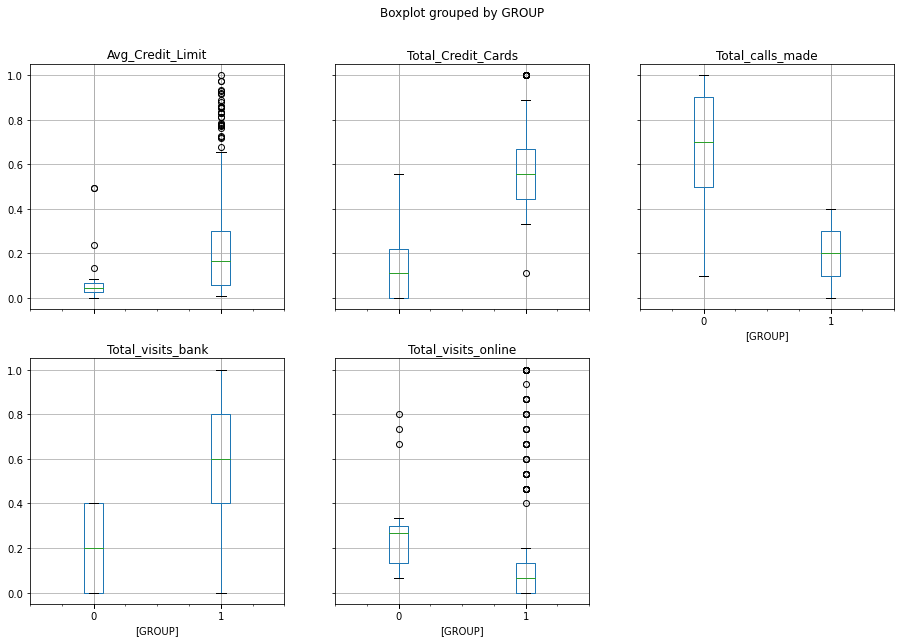

In [94]:
customerScaled.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

Clusters appear distinct , although some overlap in total visits online

#  Let us next try with K = 3, this is the best value as per silhouette score

In [95]:
final_model=KMeans(3)
final_model.fit(custattr)
prediction=final_model.predict(custattr)

#Append the prediction 
customer_df["GROUP"] = prediction
customerScaled["GROUP"] = prediction
print("Groups Assigned : \n")
customer_df.head()
customerScaled.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,0.492386,0.111111,0.2,0.066667,0.0,0
1,0.238579,0.222222,0.0,0.666667,0.9,1
2,0.238579,0.666667,0.2,0.200000,0.4,0
3,0.137056,0.444444,0.2,0.066667,0.4,1
4,0.492386,0.555556,0.0,0.800000,0.3,2


In [96]:
customerClust = customer_df.groupby(['GROUP'])
customerClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,33792.207792,5.516883,3.496104,0.981818,1.994805
1,12253.333333,2.422222,0.933333,3.542222,6.857778
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [97]:
customerClust.count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,385,385,385,385,385
1,225,225,225,225,225
2,50,50,50,50,50


There is a significant difference in the mean values of features, which is a good thing. The results also align with
the corration analysis i.e. those with higher average credit limit and higher number of cards have lower number of calls made. The group 1
has higher number of total visits to bank, this is because it is positively co-related to higher total_credit cards. Interestingly 
group 2, which has highest number of total_credit_cards, have lowest mean total visits to bank. However this is because group 2 has only
50 customers, which is only around 7% of volume. This group has also highes total_visits_online. This shows that this group of 50 customers
is an exclusive group with very high average credit limit, high number of cards and tech savvy customers who do far more online banking.
This group needs to be exclusively focussed by the bank for further marketing.
On the other hand the Group 0 consists of low average spend customers who seem to be making high number of calls. This group is 
significant for targetting improvement in support service


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023385AC6610>,
      dtype=object)

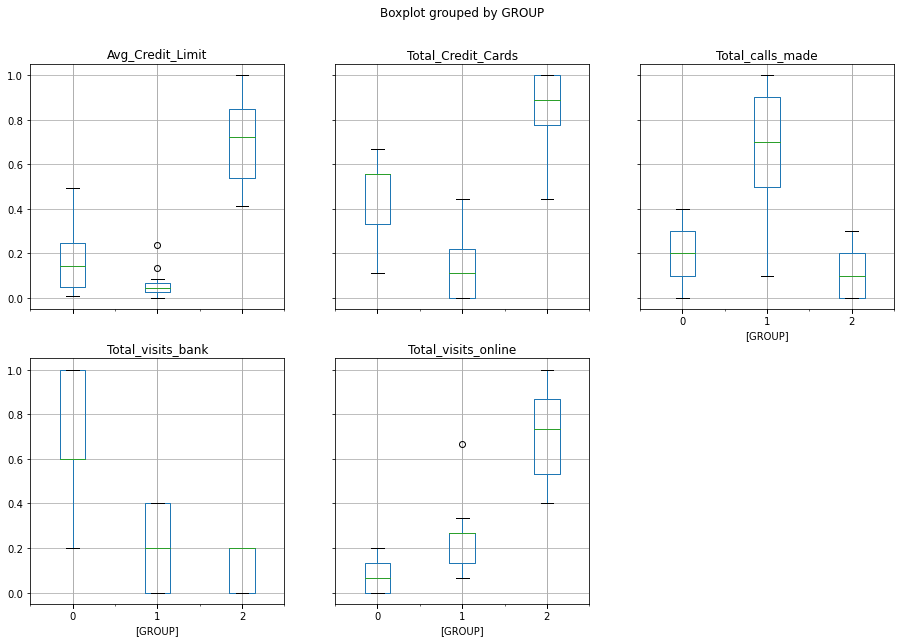

In [98]:
customerScaled.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

The plots show that the clusters are reasonably non-overlapping although there is some overlap in total visits to bank and very minor overlaps
in other features excepts total credit cards.
To be assured, we should plot the boxplots on unscaled data and ensure they are similar

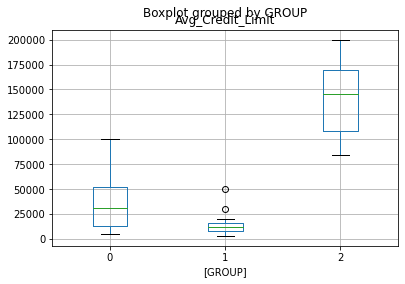

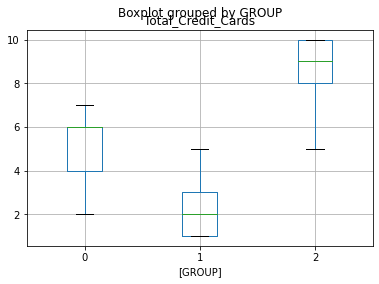

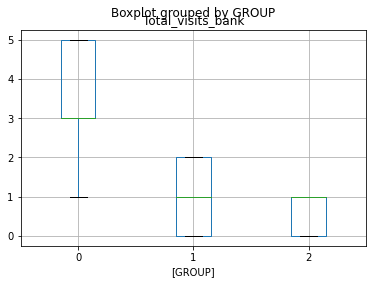

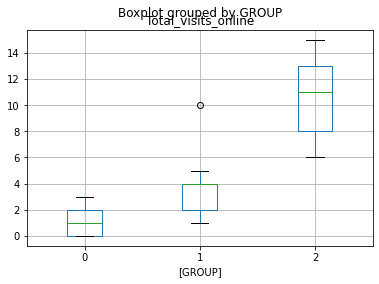

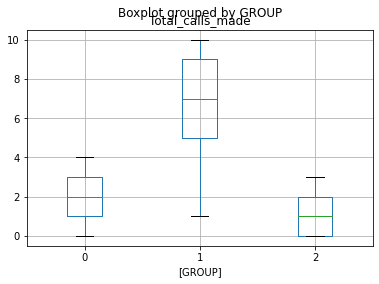

In [99]:
for i in ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online', 'Total_calls_made']:
    customer_df[[i, 'GROUP']].boxplot(by='GROUP') #boxplots on unscaled data

We can see that the boxplots on unscaled data (which is the true data) show same results. Please note Z-SCORE scaling
would have given us different boxplots here , therefore we used Minmax scaling

In [100]:
# reconfirm Avg Silhoutte Score for 3 clusters

score = silhouette_score(custattr, prediction, metric='euclidean')

In [101]:
print(score)

0.5254186541442241


## Hierarchical or Agglomerative Clustering

We shall take the agglomerative method that gives the best cophenetic coefficient and then for that method we would choose the
best number of clusters based on silhouette scores.
I have drawn dendograms for each linkage method, however it is difficult to decide best number of clusters from dendogram. The way to
do it is to draw 2 horizobatal parallel lines, placed as apart as possible. such that they cut the same number of vertical lines and give the MAXIMUM vertical distance between them.
The number of vertical lines that they will cut thorugh is equal to number of clusters. However this is a tedious visual method, so
we shall use silhouette scores to determine the bext number of clusters.

In [102]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


In [103]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(customerScaled_hier, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(customerScaled_hier))

c

0.8537418413450458

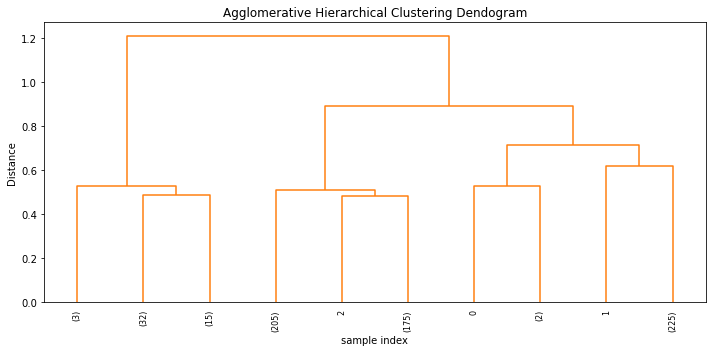

In [104]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8., truncate_mode='lastp', p=10)
plt.tight_layout()

In [105]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(customerScaled_hier, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(customerScaled_hier))

c

0.8124636075444971

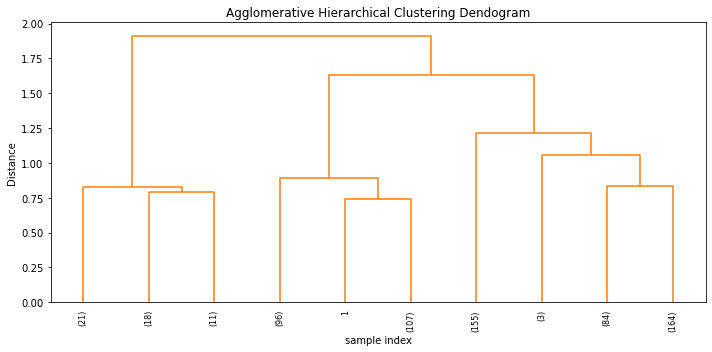

In [106]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8., truncate_mode='lastp', p=10)
plt.tight_layout()

In [107]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(customerScaled_hier, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(customerScaled_hier))

c

0.7528855688899404

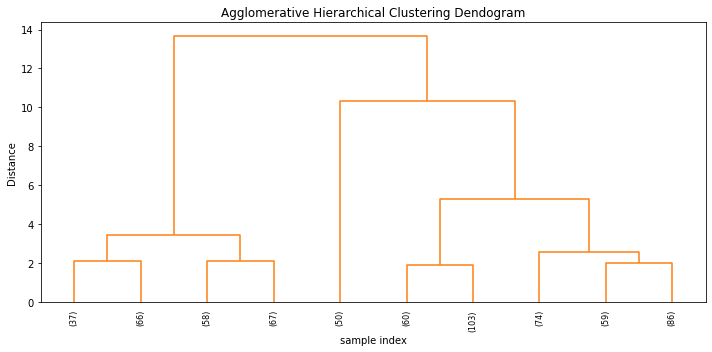

In [108]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8., truncate_mode='lastp', p=10)
plt.tight_layout()

In [109]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(customerScaled_hier, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(customerScaled_hier))

c

0.643986329367493

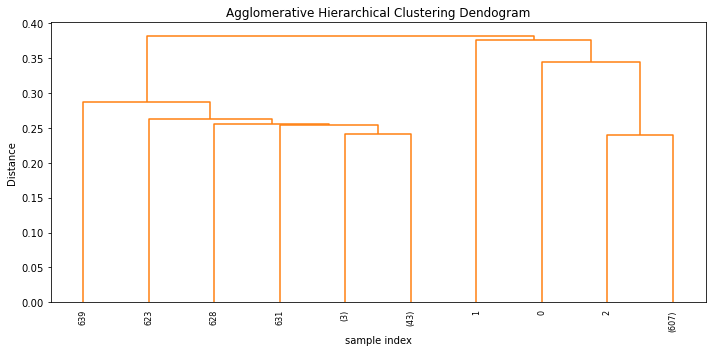

In [110]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8., truncate_mode='lastp', p=10 )
plt.tight_layout()

# The 'average' linkage method is giving the best cophenetic coeficient.
So I shall use that and choose the best number of clusters based on which number from 2 to 9 givens me the highest silhouette score 


In [111]:
agl_clusters=range(2,10)

#Let us calculate silhoutte scores also at the same time so we can view them separately , higher the score better
agl_scores=[]

for k in agl_clusters:
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    model.fit(custattr)
    prediction=model.labels_  #Alternatively we can also use model.fit_predict, it gives the same result
    
    agl_score = silhouette_score(custattr, prediction, metric='euclidean')
    agl_scores.append("%.3f" % agl_score)


In [112]:
print("No. of clusters", " ", list(agl_clusters))
print("Silhouette scores", " ", agl_scores)

No. of clusters   [2, 3, 4, 5, 6, 7, 8, 9]
Silhouette scores   ['0.482', '0.522', '0.443', '0.395', '0.357', '0.330', '0.259', '0.260']


# 3 clusters are giving the best score (0.52), the second best is 2 clusters
It is interesting to note that K means gave exactly same recommedation, althogh scores were slightly different

In [113]:
#Let us run for 2 clusters and append predictions
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')

In [114]:
model.fit(custattr)

AgglomerativeClustering(linkage='average')

In [115]:
customer_df_hier['labels'] = model.labels_
customerScaled_hier['labels'] = model.labels_
customer_df_hier.head(10)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,0
6,100000,5,0,11,2,1
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0


In [116]:
prediction=model.fit_predict(custattr) #lablels- or fit_predict should give same result

In [117]:
score = silhouette_score(custattr, prediction, metric='euclidean')
print(score) #reconfirming the silhouette score

0.4818387025960948


### Analyze the distribution of the data among the groups (K = 2), using Mean and Count functions and boxplots.


In [118]:
customerClust = customer_df_hier.groupby(['labels'])
customerClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,25847.540984,4.37541,2.55082,1.92623,3.788525
1,141040.000000,8.74000,0.60000,10.90000,1.080000


In [119]:
customerClust.count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,610,610,610,610,610
1,50,50,50,50,50


There is a significant difference in the mean values of features, which is a good thing. The results also align with
the correlation analysis i.e. those with higher average credit limit and higher number of cards have lower number of calls made. 
NOTE the siginificant difference between the 2 clusters here and the 2 clusters from K means. The 2 clusters here are FAR BETTER defined
with 50 customers in group 1 highly separated from 610 customers from group 0, with every mean value very distinct from corresponding 
mean value of group 0. YOU CAN ALSO SEE THAT GROUP 1 HERE IS ACTUALLY QUITE SIMILAR TO GROUP 2 FROM 3-CLUSTERS KMEANS ALGORITHM, which again
confirms the fact that these 50 customers with very high average credit limit, higher number of cards, high number of online visits and
lower number of physical visits and calls, are a special segment that needs to be targetted for marketting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002338293E400>,
      dtype=object)

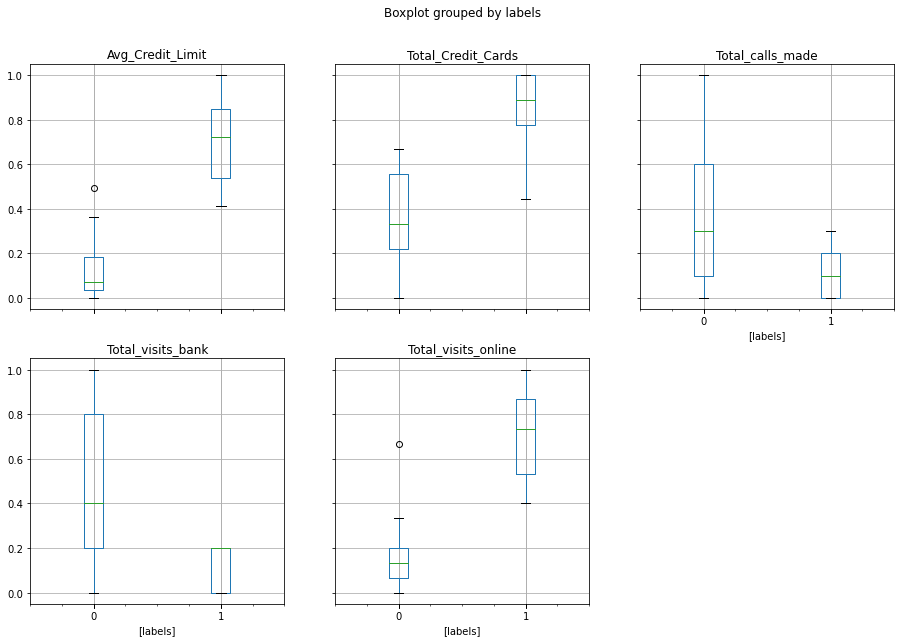

In [120]:
#Now let us do the boxplots
customerScaled_hier.boxplot(by='labels', layout = (2,3),figsize=(15,10))

# Now let us try the best from Aglomorative i.e. 3 clusters

In [121]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [122]:
model.fit(custattr)
prediction=model.fit_predict(custattr)

In [123]:
customer_df_hier["labels"] = model.labels_
customerScaled_hier["labels"] = model.labels_
print("Groups Assigned : \n")
customer_df_hier.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,2
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


In [124]:
customerClust = customer_df_hier.groupby(['labels'])
customerClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,12637.554585,2.449782,0.947598,3.493450,6.790393
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,33787.401575,5.532808,3.514436,0.984252,1.984252


In [125]:
customerClust.count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,229,229,229,229,229
1,50,50,50,50,50
2,381,381,381,381,381


NOTE: The 3 clusters here are very similar to 3 clusters from K-Means, only the labelling has changed. Label 0 here corresponds to
    group 0 of K-Means (avg credit limit mean 12k). Label 1 here to Group 2 of K-means (avg ctedit limit mean 141k) and Label 2 corresponds
    to Group 1 of K-Means (avg credit limit mean 33k).
    
    EFFECTIVELY, FOR 3 CLUSTERS, BOTH METHODS HAVE IDENTIFIED SAME CLUSTERS. Thiis is also confirmed from the fact that the
    Silhoutte score for 3 clusters is also same (0.52) for both Hierarchical and K-Means

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023387C4E220>,
      dtype=object)

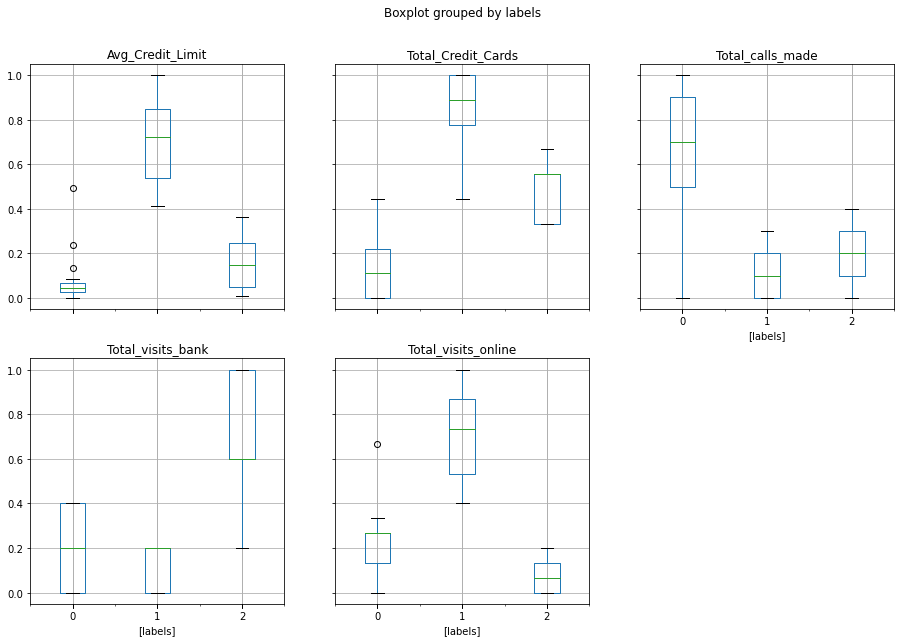

In [126]:
# Now let us run the boxplots 
customerScaled_hier.boxplot(by='labels', layout = (2,3),figsize=(15,10))

The plots show that the clusters are reasonably non-overlapping although there is some overlap in total visits to bank and very minor overlaps
in other features excepts total credit cards. THE PLOTS ARE INFACT VERY SIMILAR TO K-MEANS clusters (expected)
To be assured, we should plot the boxplots on unscaled data and ensure they are similar

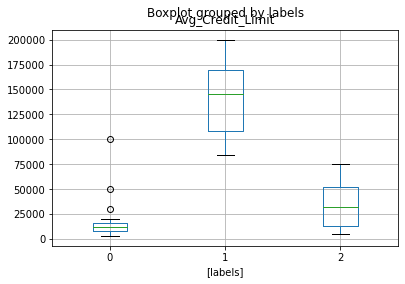

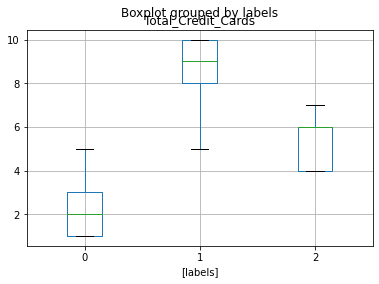

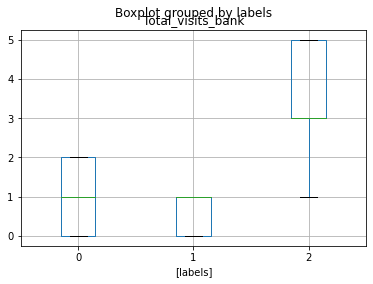

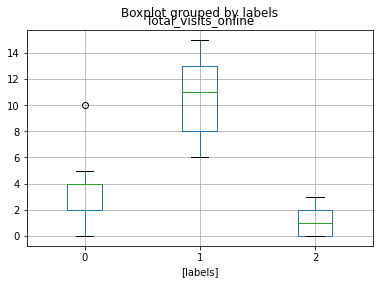

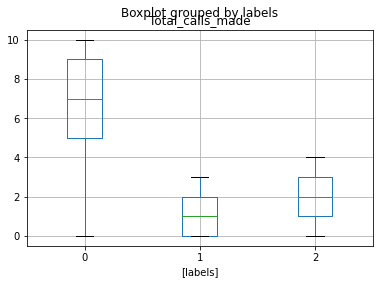

In [127]:
for i in ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online', 'Total_calls_made']:
    customer_df_hier[[i, 'labels']].boxplot(by='labels')

We can see that the boxplots on unscaled data (which is the true data) show same results. Please note Z-SCORE scaling
would have given us different boxplots here , therefore we used Minmax scaling

## CONCLUSION

To answer all the questions in this project we have used both the hierarchical and K-means clustering. As both the methods
beautifully converge on 3 clusters , I would go with 3 clusters. 
Now let me answer all the questions:
    1. There are 3 segments of customers
    
    2. The key differentiating factors are:
        Average credit Limit - this is the most distiguishing feature with the highert cluster having mean of 141k and lowest 12k
        Total credit cards - this is the next differentiating factor with highest cluster with mean of 8.7 and lowest 2.4
        Total calls made - this is the next distinguishing factor related NEGATIVELY to first 2 factors
        Total vistis online and total visits to bank are slighly less distinguishing factors
        The first 2 are important from marketing perspective as the third is important from support perspective
        
    3. Recommendation to bank - 
        Focus on the segment of 50 customers (group 2 from K-means or label 1 from Agglomerative) who have very high
        average credit limit (approx 141k), high number of credit cards and high online activity. This group should be focussed for marketing.
        
        The bank should also focus on group of around 225 customers (group 0 from K-means or label 0 from Agglomerative) who are making
        high number of (mean 6.88) calls. These customers have lower avg credit limit and lower number of cards. This is a very distinct
        group from the 50 customers with
        highest credit limit. It is possible that this group consists of vulnerable customers etc who may be more comfortable calling
        by telephone. The bank should monitor and improve the service provied to this segment.
        
        Lastly the remaining cluster of around 380 customers falls somewhere between these 2 segments. These customers may be willing to
        take on addtional products but they may also complain if phone service is poor
        
    4. Done
    
    5. Done
    
    6. Done
    
    7. Done
    
    8. Done. Scores calculated for 2 to 9 clusters for both methods. Both K-means and Agglomerative gave silhouette scores
       of 0.52 for 3 clusters, which was the best. For 2 clusters K-means gave 0.44 whereas
      Agglomerative gave 0.48
        
    9. Based on Silhouette scores, both K-means and Agglomerative gave 3 clusters as best and 2 as second best. 
        For 3 clusters, both methods identified almost same clusters and gave identical Silhouette scores (0.52).
        However for 2 clusters Agglomerative clusters have better quality and silhouette scores than K-means
    
    10. Done as above
